<a href="https://colab.research.google.com/github/mdparvex/DeepFake/blob/main/CustomModelDataset140k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout,BatchNormalization 
from keras.preprocessing.image import ImageDataGenerator
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import pandas as pd

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

#import splitfolders
import os
import cv2
import numpy as np
import random

In [ ]:
!unrar x "/content/drive/MyDrive/real-vs-fake.rar"

Streaming output truncated to the last 5000 lines.
Extracting  real-vs-fake/valid/real/34827.jpg                             96%  OK 
Extracting  real-vs-fake/valid/real/34828.jpg                             96%  OK 
Extracting  real-vs-fake/valid/real/34832.jpg                             96%  OK 
Extracting  real-vs-fake/valid/real/34836.jpg                             96%  OK 
Extracting  real-vs-fake/valid/real/34839.jpg                             96%  OK 
Extracting  real-vs-fake/valid/real/34847.jpg                             96%  OK 
Extracting  real-vs-fake/valid/real/34848.jpg                             96%  OK 
Extracting  real-vs-fake/valid/real/34852.jpg                             96%  OK 
Extracting  real-vs-fake/valid/real/34861.jpg                             96%  OK 
Extracting  real-vs-fake/valid/real/34864.jpg                             96%  OK 
Extracting  real-vs-fake/vali

In [ ]:
train= '/content/real-vs-fake/train'
val= '/content/real-vs-fake/valid'

In [ ]:

image_gen = ImageDataGenerator(rescale=1./255.
                               )
batch_size = 64
train_flow= image_gen.flow_from_directory(
    train,
    target_size = (224, 224),
    batch_size = batch_size,
    class_mode ='binary'
)


image_gen1 = ImageDataGenerator(rescale=1./255.)
valid_flow = image_gen1.flow_from_directory(
    val,
    target_size = (224, 224),
    batch_size = batch_size,
    class_mode = 'binary'
)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [ ]:
'''from tensorflow.keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
"""
    Propsoed CNN architecture.
    
"""

model = Sequential()

# Pamameters Initialization
input_shape = (224,224,3)
activation = 'relu'
padding = 'same'
droprate = 0.1
epsilon=0.001

model = Sequential()
model.add(BatchNormalization(input_shape=input_shape))
model.add(Conv2D(filters=16, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))


model.add(Conv2D(filters=32, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters=64, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters=128, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters=256, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters=512, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(256, kernel_initializer='glorot_normal', activation='relu'))
model.add(Dropout(0.1))
          
model.add(Dense(128, kernel_initializer='glorot_normal', activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dropout(droprate))
model.add(Dense(1, activation='sigmoid'))'''

In [ ]:

def get_model():

  model = Sequential()
  model.add(Conv2D(256,3,padding="same", activation="relu", input_shape=(224,224,3)))
  model.add(MaxPool2D())

  model.add(Conv2D(128, 3, padding="same", activation="relu"))
  model.add(MaxPool2D())
  model.add(Dropout(0.2))

  model.add(Conv2D(128, 3, padding="same", activation="relu"))
  model.add(BatchNormalization())
  model.add(MaxPool2D())

  model.add(Conv2D(64, 3, padding="same", activation="relu"))
  model.add(BatchNormalization())
  model.add(MaxPool2D())

  model.add(Conv2D(64, 3, padding="same", activation="relu"))
  model.add(MaxPool2D())
  model.add(Dropout(0.2))


  model.add(Flatten())
  model.add(Dense(64,activation="relu"))
  model.add(Dense(32, activation="relu"))
  model.add(Dense(1, activation="sigmoid"))

  return model

model=get_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 256)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 128)     295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 56, 56, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       1

In [ ]:
# Parameters Initialization
from tensorflow.keras.optimizers import SGD, Adam

#opt = rmsprop(lr=0.0001, decay=1e-6)

model.compile(loss='binary_crossentropy',optimizer=Adam(0.001), metrics=['accuracy'])

In [ ]:
train_steps = 40000//batch_size
valid_steps = 5000//batch_size
history = model.fit_generator(
    train_flow,
    epochs=40,
    steps_per_epoch=train_steps,
    validation_data=valid_flow,
    validation_steps=valid_steps
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/40
625/625 [==============================] - 343s 521ms/step - loss: 0.5884 - accuracy: 0.6796 - val_loss: 0.7817 - val_accuracy: 0.5463
Epoch 2/40
625/625 [==============================] - 318s 509ms/step - loss: 0.4946 - accuracy: 0.7589 - val_loss: 0.4652 - val_accuracy: 0.7744
Epoch 3/40
625/625 [==============================] - 320s 511ms/step - loss: 0.4395 - accuracy: 0.7956 - val_loss: 0.4344 - val_accuracy: 0.7987
Epoch 4/40
625/625 [==============================] - 323s 517ms/step - loss: 0.3916 - accuracy: 0.8225 - val_loss: 0.3868 - val_accuracy: 0.8241
Epoch 5/40
625/625 [==============================] - 314s 503ms/step - loss: 0.3527 - accuracy: 0.8456 - val_loss: 0.3408 - val_accuracy: 0.8526
Epoch 6/40
625/625 [==============================] - 313s 501ms/step - loss: 0.3160 - accuracy: 0.8630 - val_loss: 0.3233 - val_accuracy: 0.8544
Epoch 7/40
625/625 [==============================] - 313s 500ms/step - loss: 0.2812 - accuracy: 0.8817 - val_loss: 0.2811 -

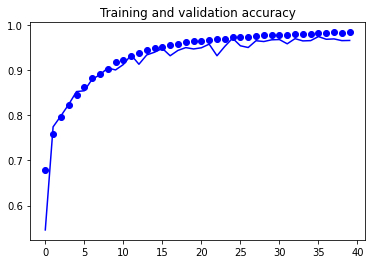

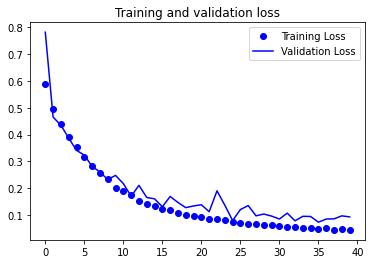

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

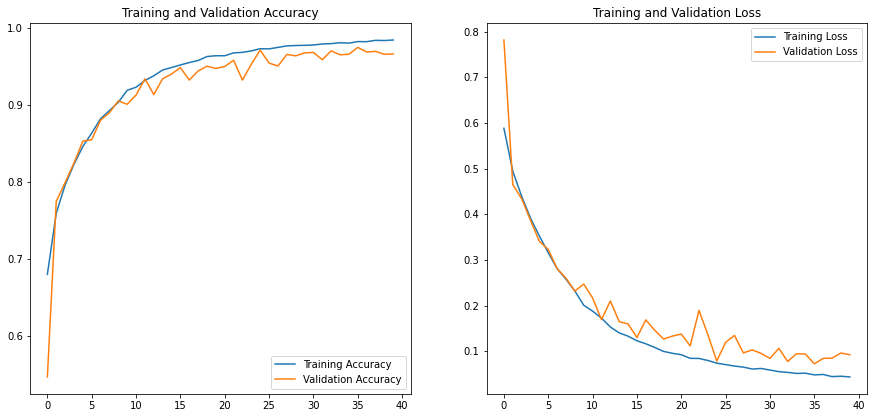

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(40)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#scores = model.evaluate(x_test,y_test , verbose=1)

In [ ]:
'''accuracy= scores[1]*100
loss=scores[0]
print('Accuracy: ', accuracy)
print('Loss: ',  loss)

In [ ]:
model.save('model.h5')

In [ ]:
model=tf.keras.models.load_model('model.h5')

In [ ]:
test='/content/real-vs-fake/test'
image_gen1 = ImageDataGenerator(rescale=1./255.)
test_generator = image_gen1.flow_from_directory(
    test,
    target_size = (224, 224),
    batch_size = 1,
    shuffle = False,
    class_mode ='binary'
)

Found 20000 images belonging to 2 classes.


In [ ]:
#actual = test_generator.classes
#predict = np.argmax(model.predict(test_generator),axis =1)

In [ ]:
predict = model.predict(test_generator)
actual = test_generator.classes


In [ ]:
print(predict)

[[0.20045952]
 [0.03796208]
 [0.0159533 ]
 ...
 [0.44764617]
 [0.9501504 ]
 [0.9797278 ]]


In [ ]:
print(actual)

[0 0 0 ... 1 1 1]


In [ ]:
from sklearn import metrics
print("ROC AUC Score:", metrics.roc_auc_score(actual, predict))
print("AP Score:", metrics.average_precision_score(actual, predict))
print()
print(metrics.classification_report(actual, predict > 0.5))

ROC AUC Score: 0.9963991249999999
AP Score: 0.9960612106177188

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     10000
           1       0.98      0.95      0.97     10000

    accuracy                           0.97     20000
   macro avg       0.97      0.97      0.97     20000
weighted avg       0.97      0.97      0.97     20000



In [ ]:
actual = test_generator.classes
predict = np.argmax(model.predict(test_generator),axis =1)